<a href="https://colab.research.google.com/github/sierraperezdavid31/CIS9650-DC-Sales/blob/main/Group_Project_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Washington DC Real Estate Sales

**Group 15 - Project 7**

**Team**
* Nusrat Akter
* Paven Oommen
* David Sierra Perez
* Katherine Terrell

December 15, 2025

# Executive Summary

Housing has become more expensive in many cities, and understanding why means that we have to look beyond rent. In this project, we are exploring the economic and neighborhood-level data to see wages, housing supply, and local conditions shape affordability. With the analysis conducted, we can see clear patterns across time. In many areas, wages are positively correlated with housing costs, and limited supply plays a major role. **What does this mean exactly?** In simple words, housing has become less affroable because wages are growing more slowly than housing costs while limited supply continues to push prices even higher. Overall, the results show how affordability has changed and why some communities are hit harder than others.

# Table of Contents
1. Introduction
2. Problem Statement
3. Data Description
4. Loading Data into Google Colab
5. Data Cleaning/Preperation
6. Data Analysis
7. Discussion & Results
8. References

# Introduction

Housing affordability has become a major concern in many cities as costs continue to rise faster than what many households can keep up with. To really understand and dive depper into these changes, this project looks at key economic and neighborhood indicators. By examining trends in wages, housing supply, and local conditions, we can gain a better grasp on how affordability differs amongst our communities.

# Problem Statement

The dataset is large and contains issues like duplicates, empty columns, and rows with missing values. Our goal is to clean and prepare the data so we can accurately analyze real estate sales in D.C., including median sale prices and how monthly sales trends have changed over time.

# Data Description

The dataset used includes property sales information from Washinton, D.C., such as sale prooce, property type, sqaure fottage, bedrooms, bathrooms, and ZIP code. After loading the data, we cleaned up missing vaues and standarized key fields so we could compare prices across neighborhoods. This dataset gives a clear overview of hosuing patterns in D.C. and helps analyze affordability across different areas.

# Loading Data into Google Colab

In [53]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Change the option to show the max amount of columns and rows
# Reference: https://bobbyhadz.com/blog/pandas-dataframe-set-number-of-max-rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [54]:
# Getting the csv from google cloud
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# The URL from Google Colab
url = "https://storage.googleapis.com/msba-online-data/CIS9650/Project%2007/DC.csv"

# Read the URL into a Dataframe
df = pd.read_csv(url)

# Data Cleaning/Preperation

In [55]:
# We are going to see the first 5 rows of data to see if it loaded properly
df.head(5)

,state,property_zip5,property_street_address,property_city,property_county,property_id,sale_datetime,property_type,sale_price,seller_1_name,buyer_1_name,building_num_units,building_year_built,source_url,book,page,transfer_deed_type,property_township,property_lat,property_lon,sale_id,deed_date,building_num_stories,building_num_beds,building_num_baths,building_area_sqft,building_assessed_value,building_assessed_date,land_area_acres,land_area_sqft,land_assessed_value,seller_2_name,buyer_2_name,land_assessed_date,seller_1_state,seller_2_state,buyer_1_state,buyer_2_state,total_assessed_value,total_appraised_value,land_appraised_value,building_appraised_value,land_type
0,DC,20002.0,1 14TH ST NE # 1,WASHINGTON,WASHINGTON,285723.0,2013-10-24 00:00:00,NaN,399999,NaN,"RAOL, NEAHA P",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DC,20002.0,1 16TH ST NE,WASHINGTON,WASHINGTON,75999.0,2021-04-08 00:00:00,NaN,900000,NaN,"THURLOW, CHRISTOPHER",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DC,20003.0,1 18TH ST SE # 101,WASHINGTON,WASHINGTON,76000.0,2003-04-28 00:00:00,NaN,200399,NaN,"O'HARA, MATTHEW E",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DC,20003.0,1 18TH ST SE # 102,WASHINGTON,WASHINGTON,76000.0,2020-11-24 00:00:00,NaN,0,NaN,CRYSTAL L BRIDGEMAN TRUSTEE,NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DC,20003.0,1 18TH ST SE # 103,WASHINGTON,WASHINGTON,76000.0,2003-01-28 00:00:00,NaN,191050,NaN,"SMITH, GENE",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# We will be using the info() function to learn more about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162846 entries, 0 to 162845
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   state                     162846 non-null  object 
 1   property_zip5             158895 non-null  float64
 2   property_street_address   162846 non-null  object 
 3   property_city             162846 non-null  object 
 4   property_county           162846 non-null  object 
 5   property_id               141273 non-null  float64
 6   sale_datetime             162846 non-null  object 
 7   property_type             0 non-null       float64
 8   sale_price                162846 non-null  int64  
 9   seller_1_name             0 non-null       float64
 10  buyer_1_name              162846 non-null  object 
 11  building_num_units        0 non-null       float64
 12  building_year_built       0 non-null       float64
 13  source_url                162846 non-null  o

In [57]:
# From the info we learned that some columns are complety empty. That means they are useless.
# We will drop those columns from the data frame by using a for loop

# df.columns gives a list of the columns. We will loop through it
for col in df.columns:

  # If the column count is 0 then we will remove the column
  if df[col].count() == 0:
    df.drop(columns = col, inplace = True)

In [58]:
# Using the unique() function we will see how many unique values appear per column
for col in df.columns:
  print(f"Column Name: {col}")
  print(f"Unique Values: {len(df[col].unique())}")
  print(df[col].unique())
  print()

Column Name: state
Unique Values: 1
['DC']

Column Name: property_zip5
Unique Values: 51
[20002. 20003. 20019. 20001.    nan 20011. 20036. 20017. 20005. 20024.
 20007. 20037. 20012. 20032. 20008. 20020. 20015. 20004. 20010. 20018.
 20009. 20071. 20590. 20542. 20237. 20530. 20548. 20045. 20006. 98109.
 20536. 20852. 20427. 20260. 20059. 20016. 20226. 76310. 20319. 20546.
 22003. 20057. 20472. 20532. 20715. 20052. 20429. 20049. 20421. 20571.
 20463.]

Column Name: property_street_address
Unique Values: 160278
['1 14TH ST NE # 1' '1 16TH ST NE' '1 18TH ST SE # 101' ...
 'WYOMING AVE NW' 'XENIA ST SE' 'YORKTOWN RD NW']

Column Name: property_city
Unique Values: 1
['WASHINGTON']

Column Name: property_county
Unique Values: 1
['WASHINGTON']

Column Name: property_id
Unique Values: 95212
[285723.  75999.  76000. ...  59573.  43135. 258563.]

Column Name: sale_datetime
Unique Values: 7012
['2013-10-24 00:00:00' '2021-04-08 00:00:00' '2003-04-28 00:00:00' ...
 '1995-05-24 00:00:00' '1993-12-30 

In [59]:
# We are noticing that columns named state, property_city, property_state, source url are all 1 value.
# We will remove them but take note of them

# State = "DC"
# Property_city = "Washington"
# Property_State = "Washington"
# Source_url = "https://opendata.dc.gov/datasets/integrated-tax-system-public-extract-property-sales"

# Remove the column with 1 unique values.
for col in df.columns:

  # if the unique value list has a length of 1, we will drop it
  if len(df[col].unique()) == 1:
    df.drop(columns = col, inplace = True)

In [60]:
# We will check the dataframe summary again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162846 entries, 0 to 162845
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_zip5            158895 non-null  float64
 1   property_street_address  162846 non-null  object 
 2   property_id              141273 non-null  float64
 3   sale_datetime            162846 non-null  object 
 4   sale_price               162846 non-null  int64  
 5   buyer_1_name             162846 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ MB


In [61]:
# We notice that the sale_price is in a objject data type
# We will convert it to a datetime value
df['sale_datetime'] = pd.to_datetime(df['sale_datetime'])

# renaming a column to accuretly represent the data with the changes we made
df.rename(columns = {"sale_datetime": "sale_date"}, inplace = True)

# We also noticed that the property zip is a float value. We will get rid of this by turning it into an integer
# We got alot of error and it turned out we needed to get rid of the null values.
# We decided as a team to make the null zipcodes to 0 then convert it to an int
df['property_zip5'] = df['property_zip5'].fillna(0)
df['property_zip5'] = df['property_zip5'].astype(int)

# We will be adding 3 columns to the data frame
# Year column to get the year of sale
# Month column to get the month of sale
# Day column to get the day of the month

df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month
df['day'] = df['sale_date'].dt.day
df['month_name'] = df['sale_date'].dt.month_name()

In [62]:
# Looking at the data 1 more time with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162846 entries, 0 to 162845
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   property_zip5            162846 non-null  int64         
 1   property_street_address  162846 non-null  object        
 2   property_id              141273 non-null  float64       
 3   sale_date                162846 non-null  datetime64[ns]
 4   sale_price               162846 non-null  int64         
 5   buyer_1_name             162846 non-null  object        
 6   year                     162846 non-null  int32         
 7   month                    162846 non-null  int32         
 8   day                      162846 non-null  int32         
 9   month_name               162846 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(3)
memory usage: 10.6+ MB


In [63]:
# Looking at the data we see that some sale price is 0
# That is not good
# We have decided to only look at data with a sale price greater than 0
new_df = df[df['sale_price'] != 0]

new_df.head()

,property_zip5,property_street_address,property_id,sale_date,sale_price,buyer_1_name,year,month,day,month_name
0,20002,1 14TH ST NE # 1,285723.0,2013-10-24,399999,"RAOL, NEAHA P",2013,10,24,October
1,20002,1 16TH ST NE,75999.0,2021-04-08,900000,"THURLOW, CHRISTOPHER",2021,4,8,April
2,20003,1 18TH ST SE # 101,76000.0,2003-04-28,200399,"O'HARA, MATTHEW E",2003,4,28,April
4,20003,1 18TH ST SE # 103,76000.0,2003-01-28,191050,"SMITH, GENE",2003,1,28,January
5,20003,1 18TH ST SE # 104,76000.0,2015-03-24,390000,"LIN, CHIENJU",2015,3,24,March


# Data Analysis


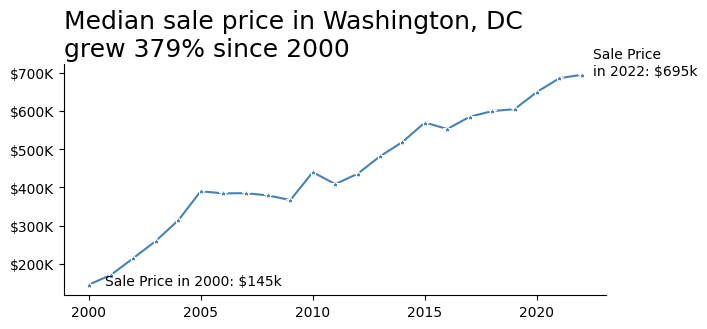

In [64]:
# Sale Date breakdown by Year
# David

# Aggregate the data
new_df = new_df[new_df['year'] >= 2000]
salebyyear = new_df.groupby(['year'])['sale_price'].median().reset_index()


# Plotting the data
fig, ax = plt.subplots(figsize = (7,3))
sns.despine()

# Creating the line plot
ax = sns.lineplot(data = salebyyear, x = 'year', y = 'sale_price', marker = "*", color = "steelblue")

# Custumizing the graphs
ax.set_title("Median sale price in Washington, DC\ngrew 379% since 2000", loc = "Left", fontdict = {'fontsize': 18})
ax.set_xlabel('')
ax.yaxis.set_major_formatter(lambda x, _: f"${int(x/1000)}K")
ax.set_ylabel('')
plt.rc('font', size = 10)


# Labeling Labels
# https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for x, y in zip(salebyyear['year'], salebyyear['sale_price']):
  if x == 2000:
    plt.text(x = x + .75, # x-coordinate position of data label
    y = y - .5, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = f"Sale Price in {x}: ${y/1000:.0f}k", # data label, formatted to ignore decimals
    color = "black",
    fontsize = 10,
    )
  elif x == 2022:
    plt.text(x = x + .5, # x-coordinate position of data label
    y = y - 1, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = f"Sale Price\nin {x}: ${y/1000:.0f}k", # data label, formatted to ignore decimals
    color = "black",
    fontsize = 10,
    )


# Show graph
plt.show()

# Notable Observation
# Median Sale Price grew 379% since 2000.
# That is an average of 7.5% increase per year

In [65]:
# Filter for valid DC ZIPs
clean_df = new_df[(new_df['property_zip5'].between(20001, 20020))].copy()

# Keep sale prices that are reasonable
clean_df = clean_df[(clean_df['sale_price'].between(100000, 1500000))]

# Keep the recent years only
clean_df = clean_df[clean_df['year'] >= 2015].copy()


In [66]:
# Get the median sale price by ZIP
zip_prices = clean_df.groupby('property_zip5')['sale_price'].median().reset_index()

# Sort by the ZIP codes
zip_prices['property_zip5'] = zip_prices['property_zip5'].astype(int)
zip_prices = zip_prices.sort_values('sale_price')


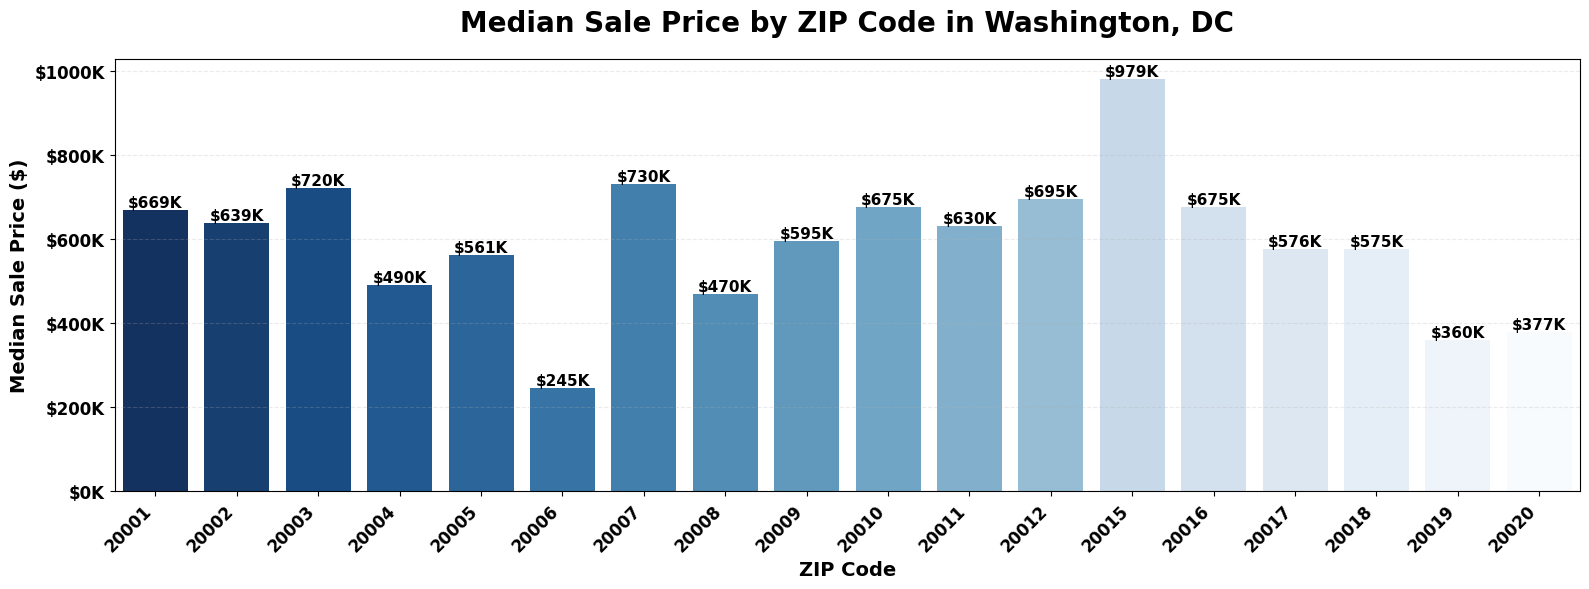

In [67]:
# DC Heatmap Chart of Median Sale Price by ZIP Code in Washington, DC
# Nus


import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("default")

fig, ax = plt.subplots(figsize=(16, 6))

sns.barplot(
    data=zip_prices,
    x="property_zip5",
    y="sale_price",
    hue="property_zip5",
    palette="Blues_r",
    dodge=False,
    ax=ax
)

# Remove legend
ax.get_legend().remove()

# Both both title and labels
ax.set_title(
    "Median Sale Price by ZIP Code in Washington, DC",
    fontsize=20,
    fontweight="bold",
    pad=20
)

ax.set_xlabel("ZIP Code", fontsize=14, fontweight="bold")
ax.set_ylabel("Median Sale Price ($)", fontsize=14, fontweight="bold")

# Bold ticks
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Format the Y-axis ($600K)
ax.yaxis.set_major_formatter(lambda x, _: f"${int(x/1000)}K")

# Bold label for bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"${int(x/1000)}K",
        label_type="edge",
        fontsize=11,
        fontweight="bold",
        color="black"
    )

ax.grid(axis="y", linestyle="--", alpha=0.25)

plt.tight_layout()
plt.show()

# ZIP codes like 20001–20010 are much more expensive
# ZIP codes like 20018–20020 are more affordable because of differences in demand and neighborhood investment.


In [68]:
# Percent Change by Zipcode
# Between year 2000 and 2022
# David

# I am filtering the dataframe to include any year after 2000 and have a sale price not equal to 0
new_df = new_df[new_df['year'] >= 2000]
new_df_zipcode_nn = new_df[new_df['property_zip5'] != 0]

# I am creating two dataframes that will be for 2000 and 2022
year_2000 = new_df_zipcode_nn[new_df_zipcode_nn['year'] == 2000]
year_2022 = new_df_zipcode_nn[new_df_zipcode_nn['year'] == 2022]

# I am aggregating both dataframes to find the median sale price for each zipcode for that year
year_2000_agg = year_2000.groupby(['year', 'property_zip5' ])['sale_price'].median().reset_index()
year_2022_agg = year_2022.groupby(['year', 'property_zip5' ])['sale_price'].median().reset_index()

# I am merging both aggregate data frames to one
both_year = pd.merge(year_2000_agg, year_2022_agg, how = 'inner', on = 'property_zip5', suffixes = ('_2000', '_2022'))

# I am filtering the dataframe to just 3 columns
both_year = both_year[['property_zip5', 'sale_price_2000', 'sale_price_2022']]

# We are creating the percent change column
both_year['percent_change'] = round((both_year['sale_price_2022'] - both_year['sale_price_2000']) / both_year['sale_price_2000'] * 100, 2)

# Formatting the column
#both_year['percent_change'] = both_year['percent_change'].apply(lambda x: '{:,.2f}%'.format(x))
both_year['property_zip5'] = both_year['property_zip5'].astype(str)
both_year['percent_change'] = both_year['percent_change'].astype(float)
both_year['pos_neg'] = both_year['percent_change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
both_year = both_year.sort_values(by = 'percent_change', ascending = False)

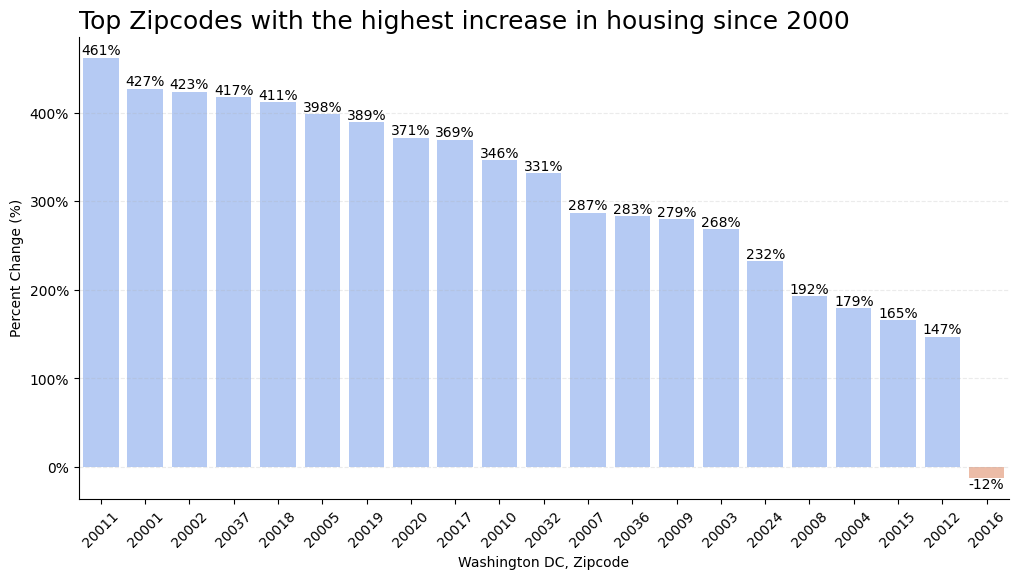

In [69]:
# Setting up the figure
fig, ax = plt.subplots(figsize = (12,6))

# Creating the barplot
ax = sns.barplot(data = both_year, x = 'property_zip5', y = 'percent_change', hue = 'pos_neg', palette = 'coolwarm')
sns.despine()

# Customizing the graph
ax.set_title("Top Zipcodes with the highest increase in housing since 2000", loc = 'left', fontdict = {'fontsize' : '18'})
ax.get_legend().remove()
ax.grid(axis="y", linestyle="--", alpha = .25)
ax.set_ylabel("Percent Change (%)")
ax.yaxis.set_major_formatter(lambda x, _: f"{int(x)}%")
ax.set_xlabel('Washington DC, Zipcode')
plt.xticks(rotation = 45)

# Adding data labels to the graph
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: f"{int(x):}%")


plt.show()

In [70]:
# Zipcode Sale Breakdown
# Paven

import pandas as pd
import matplotlib.pyplot as plt

# Use the cleaned dataset created earlier
df = clean_df.copy()

# Ensure ZIP codes are valid
df = df[df['property_zip5'].notna()]
df['property_zip5'] = df['property_zip5'].astype(int)

# Group by ZIP code and calculate summary statistics
zip_summary = (
    df.groupby('property_zip5')
      .agg(
          total_sales=('sale_price', 'count'),
          median_price=('sale_price', 'median'),
          average_price=('sale_price', 'mean')
      )
      .reset_index()
)

# Sort by most active ZIP codes
zip_summary = zip_summary.sort_values('total_sales', ascending=False)

zip_summary



,property_zip5,total_sales,median_price,average_price
1,20002,7229,639000.0,664292.357587
8,20009,5873,595000.0,650378.523923
10,20011,5546,630000.0,644225.400649
0,20001,4930,669000.0,709904.671805
16,20019,3685,360000.0,370371.572049
2,20003,3468,720000.0,748068.893310
9,20010,2974,675000.0,689637.951917
6,20007,2783,730000.0,745610.871003
17,20020,2558,377750.0,402700.783034
13,20016,2411,675000.0,731855.856906


WASHINGTON D.C. REAL ESTATE MARKET BY ZIP CODE

Total Properties Analyzed: 51,080
Citywide Median Price: $595,000
Number of ZIP Codes: 18


TOP 10 MOST ACTIVE ZIP CODES BY SALES VOLUME:
----------------------------------------------------------------------------------------------------
 ZIP Code Total Sales Median Price Average Price Min Price  Max Price       Std Dev Market Share Premium vs City
    20002       7,229     $639,000      $664,292  $107,000 $1,500,000 268958.980751       14.15%           +7.4%
    20009       5,873     $595,000      $650,379  $100,000 $1,500,000 285622.628387        11.5%           +0.0%
    20011       5,546     $630,000      $644,225  $100,000 $1,500,000 250235.531044       10.86%           +5.9%
    20001       4,930     $669,000      $709,905  $100,000 $1,500,000 270258.905758        9.65%          +12.4%
    20019       3,685     $360,000      $370,372  $100,000 $1,500,000 152895.466965        7.21%          -39.5%
    20003       3,468     $720,000 

/tmp/ipython-input-1026107489.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


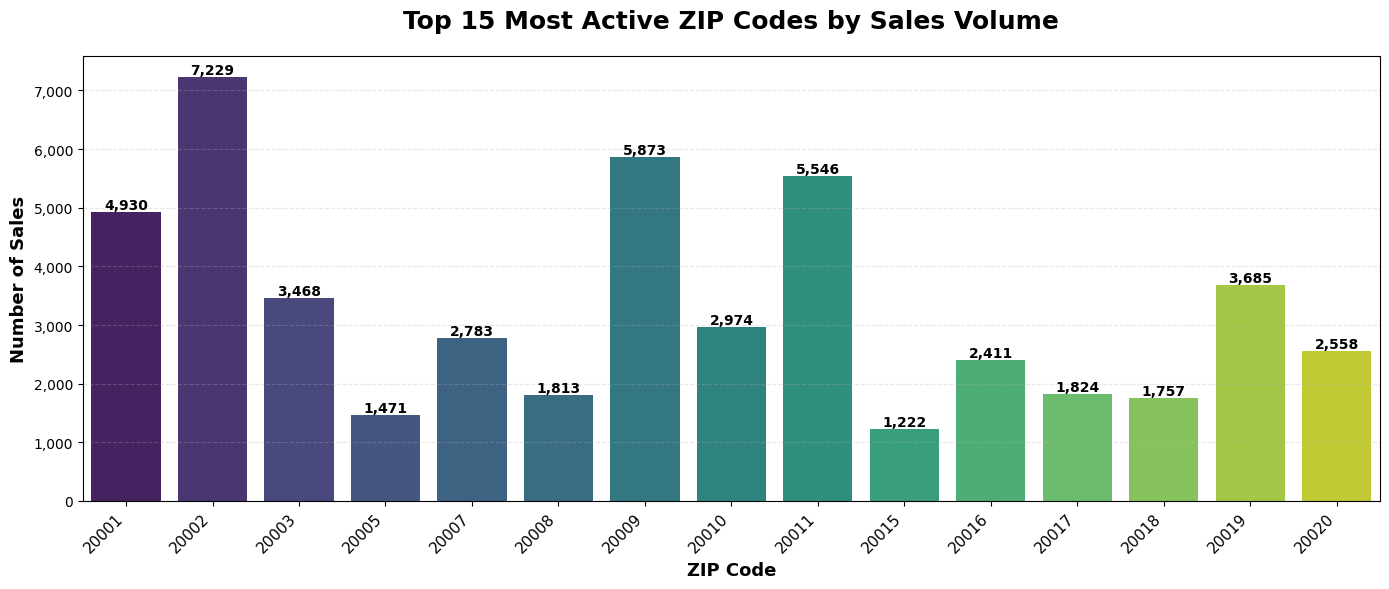

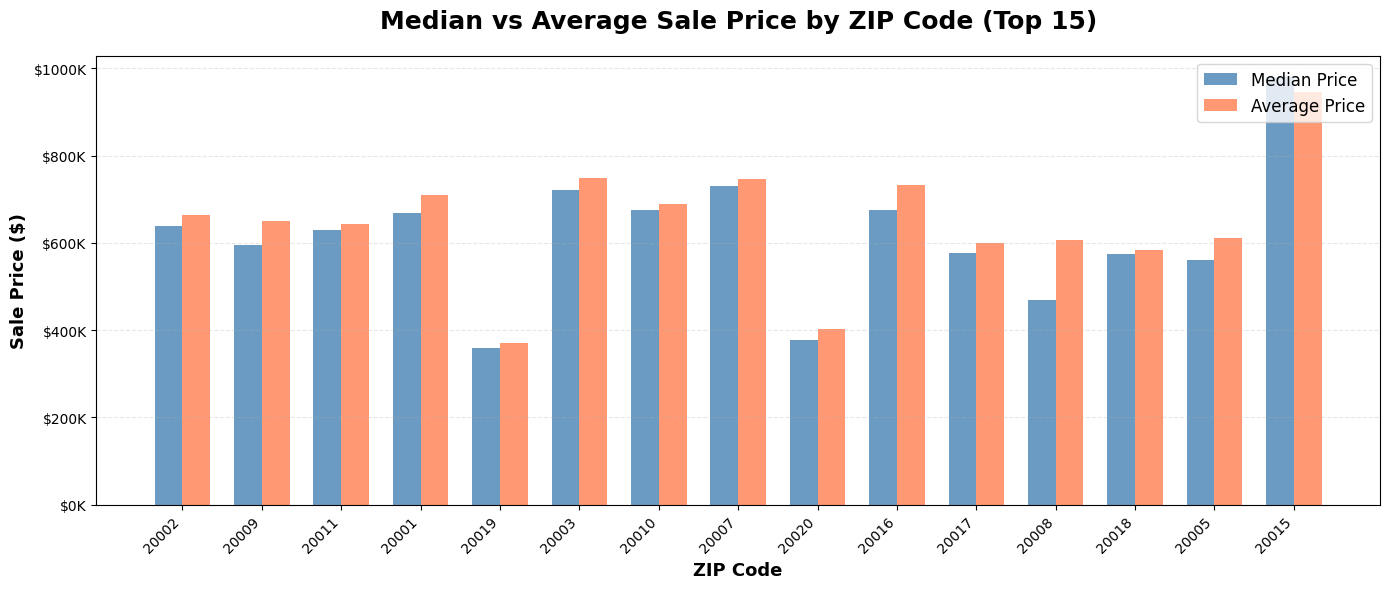

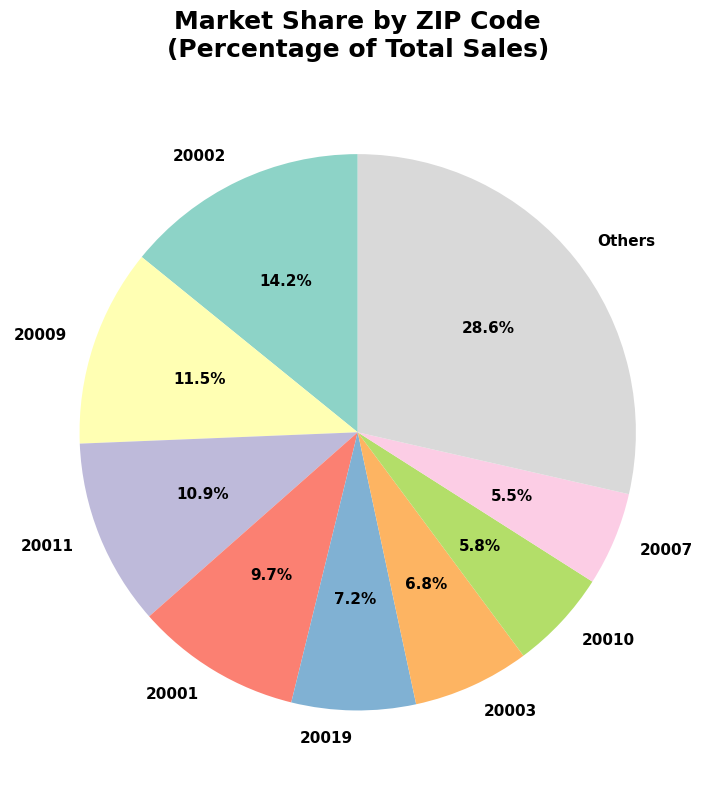


STYLED TABLE (Best viewed in Jupyter Notebook):

KEY INSIGHTS FROM ZIP CODE ANALYSIS

📊 SALES VOLUME:
   • Most active: ZIP 20002 with 7,229 sales
   • Least active: ZIP 20006 with 82 sales

💰 MEDIAN PRICES:
   • Highest: ZIP 20015 at $979,500
   • Lowest: ZIP 20006 at $245,000
   • Price gap: $734,500

📈 MARKET CONCENTRATION:
   • Top 5 ZIP codes account for 53.4% of all sales
   • Indicates high market concentration

📊 PRICE VARIABILITY:
   • Average standard deviation: $264,334
   • Suggests high price variability within ZIP codes

🏘️ AFFORDABILITY DISTRIBUTION:
   • Premium areas (>20% above city median): 3 ZIP codes
   • Affordable areas (<20% below city median): 4 ZIP codes
   • Middle-market areas: 11 ZIP codes


📋 COMPREHENSIVE MARKET SUMMARY:
                      Metric                   Value
    Total ZIP Codes Analyzed                      18
       Total Properties Sold                  51,080
       Average Sales per ZIP                   2,838
       Citywide Median Pr

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate comprehensive summary statistics by ZIP code
zip_summary = (
    clean_df.groupby('property_zip5')
    .agg(
        total_sales=('sale_price', 'count'),
        median_price=('sale_price', 'median'),
        average_price=('sale_price', 'mean'),
        min_price=('sale_price', 'min'),
        max_price=('sale_price', 'max'),
        std_price=('sale_price', 'std')
    )
    .reset_index()
)

# Sort by most active ZIP codes (highest sales volume)
zip_summary = zip_summary.sort_values('total_sales', ascending=False)

# Add a market share column
zip_summary['market_share_pct'] = (
    zip_summary['total_sales'] / zip_summary['total_sales'].sum() * 100
).round(2)

# Calculate price premium compared to citywide median
citywide_median = clean_df['sale_price'].median()
zip_summary['premium_vs_city'] = (
    (zip_summary['median_price'] - citywide_median) / citywide_median * 100
).round(1)

print("=" * 100)
print("WASHINGTON D.C. REAL ESTATE MARKET BY ZIP CODE")
print("=" * 100)
print(f"\nTotal Properties Analyzed: {clean_df.shape[0]:,}")
print(f"Citywide Median Price: ${citywide_median:,.0f}")
print(f"Number of ZIP Codes: {len(zip_summary)}")
print("\n")

# Display formatted table
print("TOP 10 MOST ACTIVE ZIP CODES BY SALES VOLUME:")
print("-" * 100)

# Create a display dataframe with formatted values
display_df = zip_summary.head(10).copy()
display_df['total_sales'] = display_df['total_sales'].apply(lambda x: f"{x:,}")
display_df['median_price'] = display_df['median_price'].apply(lambda x: f"${x:,.0f}")
display_df['average_price'] = display_df['average_price'].apply(lambda x: f"${x:,.0f}")
display_df['min_price'] = display_df['min_price'].apply(lambda x: f"${x:,.0f}")
display_df['max_price'] = display_df['max_price'].apply(lambda x: f"${x:,.0f}")
display_df['market_share_pct'] = display_df['market_share_pct'].apply(lambda x: f"{x}%")
display_df['premium_vs_city'] = display_df['premium_vs_city'].apply(lambda x: f"{x:+.1f}%")

# Rename columns for better display
display_df.columns = [
    'ZIP Code', 'Total Sales', 'Median Price', 'Average Price',
    'Min Price', 'Max Price', 'Std Dev', 'Market Share', 'Premium vs City'
]

print(display_df.to_string(index=False))
print("=" * 100)

# =============================================================================
# VISUALIZATION 1: Sales Volume by ZIP Code
# =============================================================================

fig, ax = plt.subplots(figsize=(14, 6))

# Use top 15 ZIP codes for clarity
top_15 = zip_summary.head(15)

sns.barplot(
    data=top_15,
    x='property_zip5',
    y='total_sales',
    palette='viridis',
    ax=ax
)

ax.set_title(
    'Top 15 Most Active ZIP Codes by Sales Volume',
    fontsize=18,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('ZIP Code', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Sales', fontsize=13, fontweight='bold')
ax.yaxis.set_major_formatter(lambda x, _: f"{int(x):,}")

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f"{int(x):,}",
        fontsize=10,
        fontweight='bold'
    )

ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 2: Price Comparison - Median vs Average
# =============================================================================

fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(top_15))
width = 0.35

bars1 = ax.bar(
    [i - width/2 for i in x],
    top_15['median_price'],
    width,
    label='Median Price',
    color='steelblue',
    alpha=0.8
)

bars2 = ax.bar(
    [i + width/2 for i in x],
    top_15['average_price'],
    width,
    label='Average Price',
    color='coral',
    alpha=0.8
)

ax.set_title(
    'Median vs Average Sale Price by ZIP Code (Top 15)',
    fontsize=18,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('ZIP Code', fontsize=13, fontweight='bold')
ax.set_ylabel('Sale Price ($)', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_15['property_zip5'].astype(str), rotation=45, ha='right')
ax.yaxis.set_major_formatter(lambda x, _: f"${int(x/1000)}K")
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 3: Market Share Pie Chart
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 8))

# Top 8 ZIP codes + "Others"
top_8 = zip_summary.head(8)
others_share = zip_summary.iloc[8:]['market_share_pct'].sum()

# Prepare data for pie chart
pie_data = pd.concat([
    top_8[['property_zip5', 'market_share_pct']],
    pd.DataFrame([{'property_zip5': 'Others', 'market_share_pct': others_share}])
])

colors = sns.color_palette('Set3', n_colors=len(pie_data))

wedges, texts, autotexts = ax.pie(
    pie_data['market_share_pct'],
    labels=pie_data['property_zip5'].astype(str),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

ax.set_title(
    'Market Share by ZIP Code\n(Percentage of Total Sales)',
    fontsize=18,
    fontweight='bold',
    pad=20
)

plt.tight_layout()
plt.show()

# =============================================================================
# STYLED TABLE OUTPUT (for Jupyter Notebook)
# =============================================================================

print("\nSTYLED TABLE (Best viewed in Jupyter Notebook):")

# Create styled table with color gradient
styled_table = (
    zip_summary
    .head(15)
    .style
    .background_gradient(subset=['total_sales'], cmap='Greens')
    .background_gradient(subset=['median_price'], cmap='Blues')
    .background_gradient(subset=['average_price'], cmap='Oranges')
    .format({
        'total_sales': '{:,.0f}',
        'median_price': '${:,.0f}',
        'average_price': '${:,.0f}',
        'min_price': '${:,.0f}',
        'max_price': '${:,.0f}',
        'std_price': '${:,.0f}',
        'market_share_pct': '{:.2f}%',
        'premium_vs_city': '{:+.1f}%'
    })
    .set_caption("Top 15 ZIP Codes by Sales Volume - Comprehensive Market Analysis")
)

# Display styled table
styled_table

# =============================================================================
# KEY INSIGHTS AND FINDINGS
# =============================================================================

print("\n" + "=" * 100)
print("KEY INSIGHTS FROM ZIP CODE ANALYSIS")
print("=" * 100)

# Find most and least active ZIP codes
most_active = zip_summary.iloc[0]
least_active = zip_summary.iloc[-1]

print(f"\n📊 SALES VOLUME:")
print(f"   • Most active: ZIP {int(most_active['property_zip5'])} with {int(most_active['total_sales']):,} sales")
print(f"   • Least active: ZIP {int(least_active['property_zip5'])} with {int(least_active['total_sales']):,} sales")

# Find highest and lowest median prices
highest_price_zip = zip_summary.loc[zip_summary['median_price'].idxmax()]
lowest_price_zip = zip_summary.loc[zip_summary['median_price'].idxmin()]

print(f"\n💰 MEDIAN PRICES:")
print(f"   • Highest: ZIP {int(highest_price_zip['property_zip5'])} at ${highest_price_zip['median_price']:,.0f}")
print(f"   • Lowest: ZIP {int(lowest_price_zip['property_zip5'])} at ${lowest_price_zip['median_price']:,.0f}")
print(f"   • Price gap: ${(highest_price_zip['median_price'] - lowest_price_zip['median_price']):,.0f}")

# Calculate concentration metrics
top_5_share = zip_summary.head(5)['market_share_pct'].sum()
print(f"\n📈 MARKET CONCENTRATION:")
print(f"   • Top 5 ZIP codes account for {top_5_share:.1f}% of all sales")
print(f"   • Indicates {'high' if top_5_share > 50 else 'moderate'} market concentration")

# Price variation analysis
avg_std = zip_summary['std_price'].mean()
print(f"\n📊 PRICE VARIABILITY:")
print(f"   • Average standard deviation: ${avg_std:,.0f}")
print(f"   • Suggests {'high' if avg_std > 200000 else 'moderate'} price variability within ZIP codes")

# Identify premium vs affordable areas
premium_zips = zip_summary[zip_summary['premium_vs_city'] > 20].shape[0]
affordable_zips = zip_summary[zip_summary['premium_vs_city'] < -20].shape[0]

print(f"\n🏘️ AFFORDABILITY DISTRIBUTION:")
print(f"   • Premium areas (>20% above city median): {premium_zips} ZIP codes")
print(f"   • Affordable areas (<20% below city median): {affordable_zips} ZIP codes")
print(f"   • Middle-market areas: {len(zip_summary) - premium_zips - affordable_zips} ZIP codes")

print("\n" + "=" * 100)

# =============================================================================
# SUMMARY STATISTICS TABLE
# =============================================================================

summary_stats = pd.DataFrame({
    'Metric': [
        'Total ZIP Codes Analyzed',
        'Total Properties Sold',
        'Average Sales per ZIP',
        'Citywide Median Price',
        'Citywide Average Price',
        'Highest ZIP Median',
        'Lowest ZIP Median',
        'Price Range',
        'Most Active ZIP Code',
        'Market Concentration (Top 5)'
    ],
    'Value': [
        f"{len(zip_summary)}",
        f"{zip_summary['total_sales'].sum():,}",
        f"{zip_summary['total_sales'].mean():,.0f}",
        f"${citywide_median:,.0f}",
        f"${clean_df['sale_price'].mean():,.0f}",
        f"${zip_summary['median_price'].max():,.0f} (ZIP {int(zip_summary.loc[zip_summary['median_price'].idxmax(), 'property_zip5'])})",
        f"${zip_summary['median_price'].min():,.0f} (ZIP {int(zip_summary.loc[zip_summary['median_price'].idxmin(), 'property_zip5'])})",
        f"${(zip_summary['median_price'].max() - zip_summary['median_price'].min()):,.0f}",
        f"ZIP {int(most_active['property_zip5'])} ({int(most_active['total_sales']):,} sales)",
        f"{top_5_share:.1f}%"
    ]
})

print("\n📋 COMPREHENSIVE MARKET SUMMARY:")
print(summary_stats.to_string(index=False))
print("=" * 100)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by ZIP code and calculate summary statistics
zip_summary = (
    clean_df.groupby('property_zip5')
    .agg(
        total_sales=('sale_price', 'count'),
        median_price=('sale_price', 'median'),
        average_price=('sale_price', 'mean')
    )
    .reset_index()
    .sort_values('total_sales', ascending=False)
)

# Display styled table with color gradient
zip_summary.style.background_gradient(cmap='Blues').format({
    'median_price': '${:,.0f}',
    'average_price': '${:,.0f}'
})

,property_zip5,total_sales,median_price,average_price
1,20002,7229,"$639,000","$664,292"
8,20009,5873,"$595,000","$650,379"
10,20011,5546,"$630,000","$644,225"
0,20001,4930,"$669,000","$709,905"
16,20019,3685,"$360,000","$370,372"
2,20003,3468,"$720,000","$748,069"
9,20010,2974,"$675,000","$689,638"
6,20007,2783,"$730,000","$745,611"
17,20020,2558,"$377,750","$402,701"
13,20016,2411,"$675,000","$731,856"


In [73]:
# Styled table with color gradient

zip_summary.style.background_gradient(cmap='Blues')






,property_zip5,total_sales,median_price,average_price
1,20002,7229,639000.000000,664292.357587
8,20009,5873,595000.000000,650378.523923
10,20011,5546,630000.000000,644225.400649
0,20001,4930,669000.000000,709904.671805
16,20019,3685,360000.000000,370371.572049
2,20003,3468,720000.000000,748068.893310
9,20010,2974,675000.000000,689637.951917
6,20007,2783,730000.000000,745610.871003
17,20020,2558,377750.000000,402700.783034
13,20016,2411,675000.000000,731855.856906


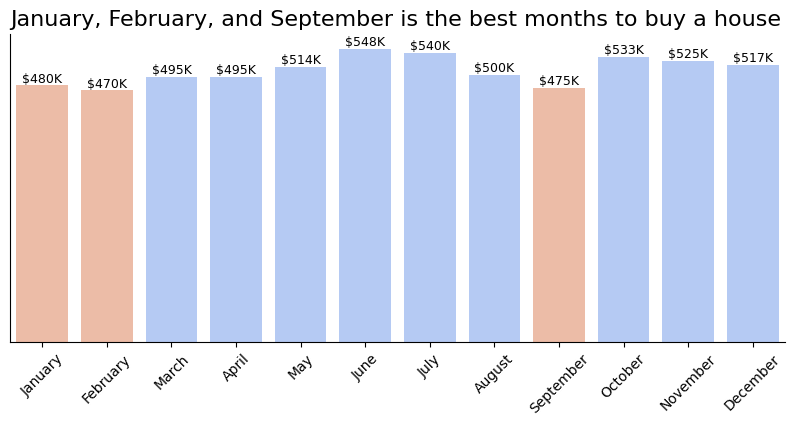

In [74]:
# Sale Date breakdown by Day, Month, Year
# David

# Aggregate the data
new_df = new_df[new_df['year'] >= 2000]
salebymonth = new_df.groupby(['month_name','month'])['sale_price'].median().reset_index()

# find the lowest sale price month
bottom_3_months = list(salebymonth['sale_price'].nsmallest(3))

# Creating a new column called lowest to find the lowest price months
salebymonth['lowest'] = salebymonth['sale_price'].apply(lambda x: True if x in bottom_3_months else False)
salebymonth = salebymonth.sort_values(by = 'month')

# Plotting the data
fig, ax = plt.subplots(figsize = (10,4))
sns.despine()

# crreating the line plot
ax = sns.barplot(data = salebymonth, x = 'month_name', y = 'sale_price', hue = 'lowest', palette = "coolwarm")

# Customization
ax.set_title('January, February, and September is the best months to buy a house', loc = "left", fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation = 45)
ax.get_yaxis().set_visible(False)
ax.get_legend().remove()
plt.rc('font', size = 9)

# Labeling Labels
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: f"${int(x/1000)}K")

# Display Barchart
plt.show()

# Possible reasons for January and February having low prices is many people living in DC are working with the government
# In January many administrations start and people leave Washington to other places
# More people put their house on sale due to changing administration

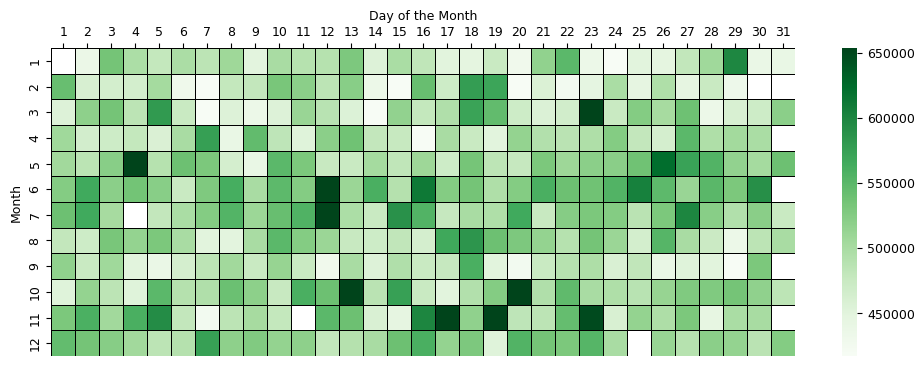

In [75]:
# Best day of the year to buy a home
new_df = new_df[new_df['year'] >= 2000]

# Aggregatingh the data to a pivot table
salebymonthday = pd.pivot_table(new_df, values = 'sale_price', index = 'month', columns = 'day', aggfunc = 'median')

# Creating the visual
fig, ax = plt.subplots(figsize = (12,4))

# Plotting the heatmap
ax = sns.heatmap(salebymonthday,  cmap = "Greens", linewidths = .5, linecolor = 'black', robust = True)

# Customizing the heatmap
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Month')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


# Show Chart
plt.show()

# Key Observations
# No sales were made on New Year Day, Christmas, Veteran Day, and the Forth of July
#

In [76]:
# Median Sale price over time (all)
# Number of properties sold
num_properties_sold = new_df['property_id'].nunique()
print(f"Number of properties sold is {num_properties_sold}")

#oldest_sale = new_df['sale_date'].min()
#newest_sale = new_df['sale_date'].max()
#print(f"The oldest property sale was {}")
#print(f"The most recent property sale was {newest_sale}")

#most_expensive_sale = new_df['sale_price'].max()
#print(f'The most expensive property sale was ${most_expensive_sale}')

#Buyer Analysis
buyer_num = new_df['buyer_1_name'].nunique()
print(f'There are {buyer_num} buyers in the dataset')
#Top 5 Buyers
top_5_buyers = new_df['buyer_1_name'].value_counts().head(5).reset_index()
top_5_buyers.columns = ['buyer_1_name', 'num_properties_sold']
top_5_buyers.index=top_5_buyers.index+1
print(top_5_buyers)
#Finding buyers most active zip codes and propery price ranges
top_5_buyers_list = top_5_buyers['buyer_1_name'].tolist()
#filtering data for top buyer transactions
df_top_5_buyers = new_df[new_df['buyer_1_name'].isin(top_5_buyers_list)]
#grouping by buyer, zip code, and amount of transactions
buyer_zip_count = df_top_5_buyers.groupby(['buyer_1_name', 'property_zip5']).size().reset_index(name='num_of_transactions')
idx=buyer_zip_count.groupby(['buyer_1_name'])['num_of_transactions'].idxmax()
most_active_zipcodes = buyer_zip_count.loc[idx].set_index('buyer_1_name')
print(most_active_zipcodes)
df_merge = new_df.merge(most_active_zipcodes, on=['buyer_1_name', 'property_zip5'], how='inner')
price_analysis = df_merge.groupby('buyer_1_name').agg(
    sale_price_min=('sale_price', 'min'),
    sale_price_max=('sale_price', 'max'),
    sale_price_mean=('sale_price', 'mean'))
price_analysis = price_analysis.reset_index() #converting index to a column
price_analysis.columns = ['Buyer Name','Min price', 'Max Price', 'Mean Price']
price_analysis.index=price_analysis.index+1
print(price_analysis)
# Katherine
#According to research the output is consistent with bulk sales or asset tranfers
#within large institutional buyers like LLCs which are represented here
#rather than individual homebuying

#creating bar graph
buyers = price_analysis['Buyer Name']
x = np.arange(len(buyers))
plt.bar ( price_analysis['Min price'])

Number of properties sold is 63588
There are 99688 buyers in the dataset
             buyer_1_name  num_properties_sold
1   LPF SENATE SQUARE LLC                  430
2       VAUGHAN PLACE,LLC                  329
3   BDC SKYHOUSE EAST LLC                  264
4  FHF I WOODLEY PARK LLC                  210
5      GATEWAY BAILEY INC                  144
                        property_zip5  num_of_transactions
buyer_1_name                                              
BDC SKYHOUSE EAST LLC           20024                  264
FHF I WOODLEY PARK LLC          20008                  210
GATEWAY BAILEY INC              20037                  144
LPF SENATE SQUARE LLC           20002                  430
VAUGHAN PLACE,LLC               20016                  329
               Buyer Name  Min price  Max Price   Mean Price
1   BDC SKYHOUSE EAST LLC   91000000   91000000   91000000.0
2  FHF I WOODLEY PARK LLC  106500000  106500000  106500000.0
3      GATEWAY BAILEY INC  111950000  111950000  

TypeError: bar() missing 1 required positional argument: 'height'

# Discussion & Results

# References

In [ ]:
#https://seaborn.pydata.org/
#McKinney, W. (2022). Python for data analysis (Third). O’Reilly Media, Inc.